In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Data Collection and Processing

In [2]:
#Load the dataset
df=pd.read_csv(r"C:\Users\anike\Downloads\Dataset .csv")
df

#Display the first few rows of the dataframe
df.head()

# Check the structure and data types
df.info()

# Summary statistics
df.describe()

# check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Level 3 Tasks

#Task 2:Vote Analysis

In [3]:
# Identify the restaurants with the highest and lowest number of votes
highest_votes = df[df['Votes'] == df['Votes'].max()]
print("Restaurant with the highest number of votes:")
print(highest_votes[['Restaurant Name', 'Votes','Aggregate rating']])

# Identifying the restaurant with the lowest number of votes
lowest_votes = df[df['Votes'] == df['Votes'].min()]
print("Restaurant with the lowest number of votes:")
print(lowest_votes[['Restaurant Name', 'Votes','Aggregate rating']])


Restaurant with the highest number of votes:
    Restaurant Name  Votes  Aggregate rating
728            Toit  10934               4.8
Restaurant with the lowest number of votes:
                 Restaurant Name  Votes  Aggregate rating
69              Cantinho da Gula      0               0.0
874                The Chaiwalas      0               0.0
879           Fusion Food Corner      0               0.0
880                Punjabi Rasoi      0               0.0
887                Baskin Robbin      0               0.0
...                          ...    ...               ...
9044               6 Packs Momos      0               0.0
9098                   Cafe' Wow      0               0.0
9099  Chef's Basket Pop Up Caf��      0               0.0
9103            The Hangout-Deli      0               0.0
9111                    Platters      0               0.0

[1094 rows x 3 columns]


Correlation between votes and rating:
                     Votes  Aggregate rating
Votes             1.000000          0.313691
Aggregate rating  0.313691          1.000000


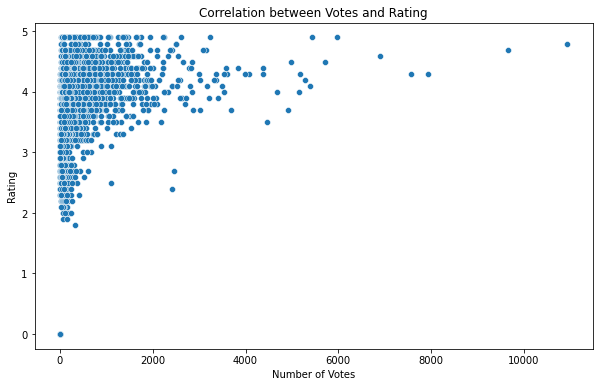

In [4]:
#  Analyze if there is a correlation between the number of votes and the rating of a restaurant
correlation = df[['Votes', 'Aggregate rating']].corr()
print("Correlation between votes and rating:")
print(correlation)

# Visualizing the correlation with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Correlation between Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

#Task 3:Price Range vs. Online Delivery and Table Booking

Online delivery distribution by price range:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444
Table booking distribution by price range:
Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577


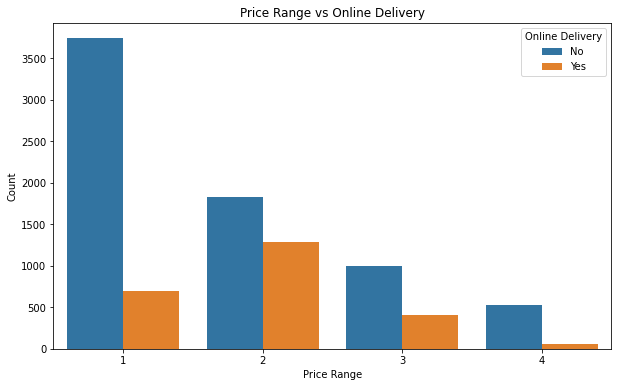

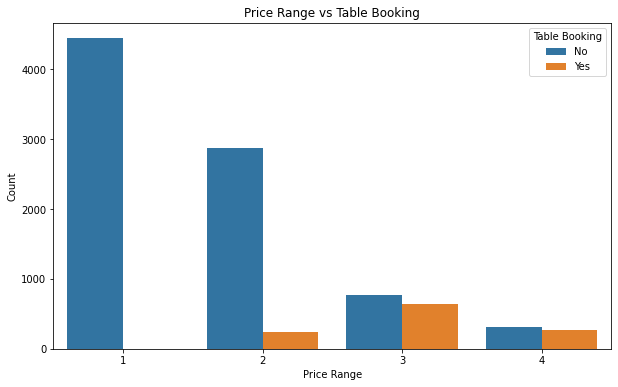

Higher-priced restaurants offering online delivery:
Has Online delivery
No     0.909556
Yes    0.090444
Name: proportion, dtype: float64
Higher-priced restaurants offering table booking:
Has Table booking
No     0.532423
Yes    0.467577
Name: proportion, dtype: float64


In [5]:
# Analyze the distribution of online delivery and table booking across different price ranges
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
table_booking_by_price = df.groupby('Price range')['Has Table booking'].value_counts(normalize=True).unstack()

print("Online delivery distribution by price range:")
print(online_delivery_by_price)

print("Table booking distribution by price range:")
print(table_booking_by_price)

# Plot the relationship between price range and online delivery
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Online delivery', data=df)
plt.title('Price Range vs Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Online Delivery', loc='upper right')
plt.show()

# Plot the relationship between price range and table booking
plt.figure(figsize=(10, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=df)
plt.title('Price Range vs Table Booking')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Table Booking', loc='upper right')
plt.show()

# Determine if higher-priced restaurants are more likely to offer online delivery and table booking
higher_priced_online_delivery = df[df['Price range'] == df['Price range'].max()]['Has Online delivery'].value_counts(normalize=True)
higher_priced_table_booking = df[df['Price range'] == df['Price range'].max()]['Has Table booking'].value_counts(normalize=True)

print("Higher-priced restaurants offering online delivery:")
print(higher_priced_online_delivery)

print("Higher-priced restaurants offering table booking:")
print(higher_priced_table_booking)